<a href="https://colab.research.google.com/github/cmd-gunma-univ/DX-highschool/blob/main/MAKER_SOIL_MOISTURE_SENSOR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 土壌の湿度センサー
[データシート](https://docs.google.com/document/d/1XErDF1j2W9LaeTdB7ySIbm4T83_ov0TZtVC47lmC7Pg/edit?tab=t.0)

#何ができるセンサか？
土壌の湿度を測定できるセンサです。\
下の図にあるように，コンデンサーの原理で土壌の水分量を測定します。\
水の誘電率は真空の誘電率と比べて80倍大きいことを利用しています。

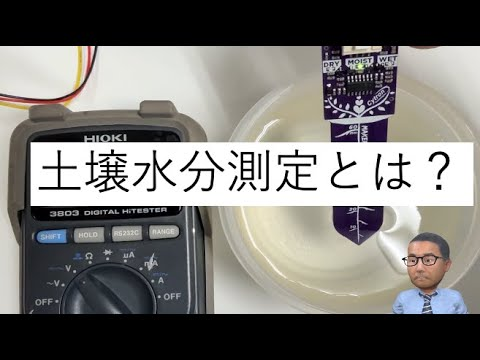

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('zS8CwkxHq8A', width=700, height=500)

# 土壌水分測定の原理

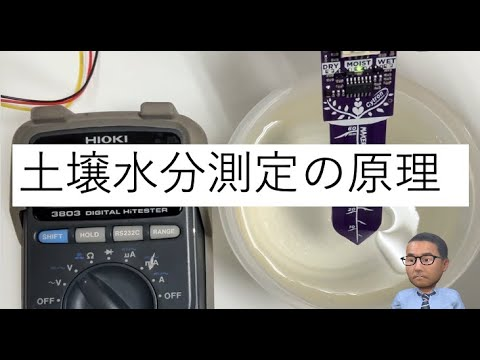

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZdFs_vKvA18', width=700, height=500)

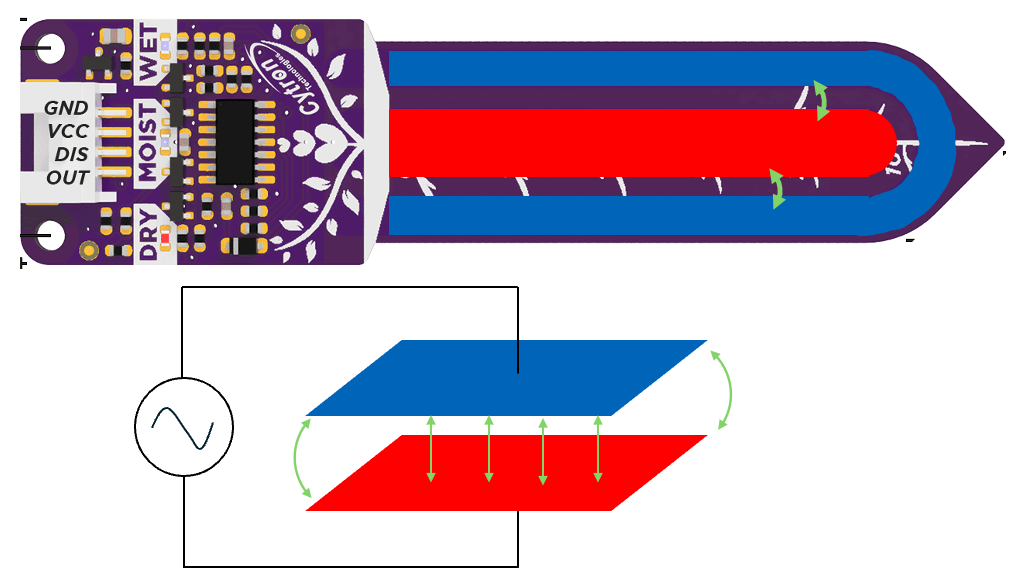

#測定方法
A/D変換についての解説は[こちら](https://colab.research.google.com/github/cmd-gunma-univ/DX-highschool/blob/main/MCP3208.ipynb)

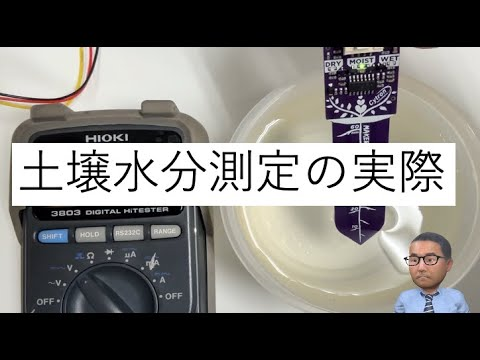

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('9Bx-g0NXQ6A', width=700, height=500)

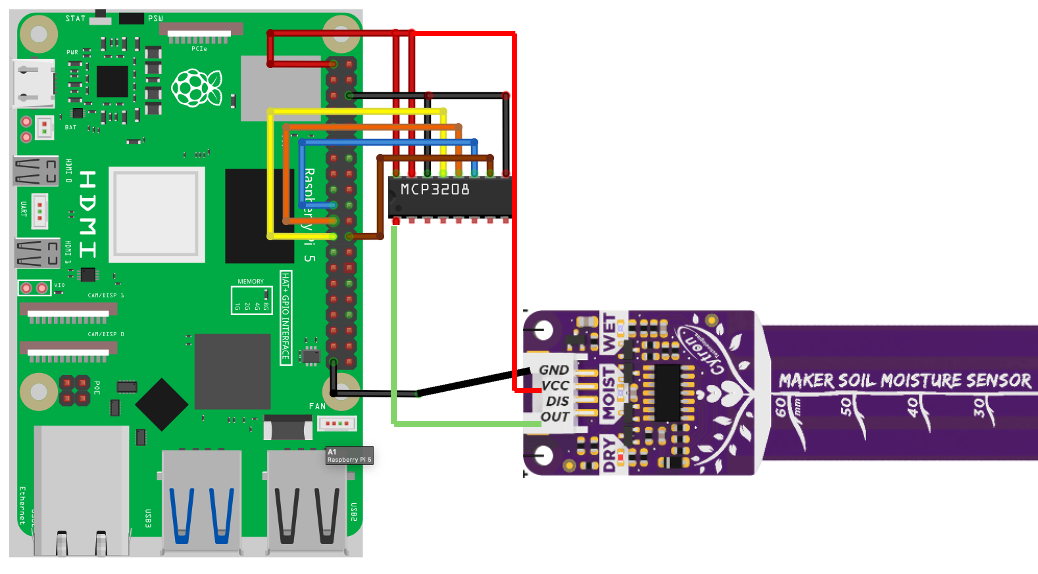

In [ ]:
#MCP3208
import spidev
from time import sleep

V_REF = 3.29476 # input Voltage
CHN = 0 # 接続チャンネル

spi = spidev.SpiDev()
spi.open(0, 0) # 0：SPI0、0：CE0
spi.max_speed_hz = 1000000 # 1MHz

def get_voltage():
    dout = spi.xfer2([((0b1000+CHN)>>2)+0b100,((0b1000+CHN)&0b0011)<<6,0]) # Din(RasPi→MCP3208）を指定
    bit12 = ((dout[1]&0b1111) << 8) + dout[2] # Dout（MCP3208→RasPi）から12ビットを取り出す
    volts = round((bit12 * V_REF) / float(4095),4)  # 取得した値を電圧に変換する（12bitなので4095で割る）
    return volts # 電圧を返す

try:
    print('--- start program ---')
    while True:
        volts = get_voltage()
        print('volts= {:3.2f}'.format(volts))
        sleep(1)

except KeyboardInterrupt:
    pass
finally:
    spi.close()
    print('--- stop program ---')